In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingRegressor
from sklearn.externals import joblib
from keras.models import Sequential
from keras.layers import Dense
from keras.engine.input_layer import Input
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import time

/home/veruska/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.
/home/veruska/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/veruska/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will 

In [2]:
file_path = '../../data/input/integrated_data_dummy.csv'

data = pd.read_csv(file_path)
data = data.sort_values(["busCode","busCodeSB"])

In [3]:
# FILTERING HIGHER HEADWAYS (2% of the data)
two_hours = 120
data = data[data.headway <= two_hours]

In [4]:
target_col = ['headway']
bb_col = ['busBunching']
features = list(set(list(data.columns))-set(target_col)-set(bb_col))

In [5]:
# Get label column and remove it from data
y = data['headway']
data.drop('headway', axis=1, inplace=True)
data.drop('busBunching', axis=1, inplace=True)

In [6]:
# Normalize data
min_max_scaler = preprocessing.MinMaxScaler()
data_scale = min_max_scaler.fit_transform(data)

In [7]:
# Making training and test data: 80% Training, 20% Test
random.seed(15) #to get always the same set
train_X, test_X, train_Y, test_Y = train_test_split(data_scale, y, test_size=0.20, random_state=7)

In [99]:
test_X

array([[0.10733453, 0.03333333, 0.07182589, ..., 1.        , 0.        ,
        0.        ],
       [0.15921288, 0.16666667, 0.16925417, ..., 1.        , 0.        ,
        0.        ],
       [0.09481216, 0.16666667, 0.05398263, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2862254 , 0.        , 0.31435234, ..., 1.        , 0.        ,
        0.        ],
       [0.22182469, 0.26666667, 0.23445642, ..., 1.        , 0.        ,
        0.        ],
       [0.25402504, 0.03333333, 0.40348079, ..., 1.        , 0.        ,
        0.        ]])

### Artificial Neural Network Model

In [8]:
# Define model - Deep Feed Forward
random.seed(42)

def create_model():

    ann_model = Sequential()
    ann_model.add(Dense(350, input_dim=len(features), activation= "relu"))
    ann_model.add(Dense(350, activation= "relu"))
    ann_model.add(Dense(350, activation= "relu"))
    ann_model.add(Dense(300, activation= "relu"))
    ann_model.add(Dense(300, activation= "relu"))
    ann_model.add(Dense(300, activation= "relu"))
    ann_model.add(Dense(250, activation= "relu"))
    ann_model.add(Dense(250, activation= "relu"))
    ann_model.add(Dense(250, activation= "relu"))
    ann_model.add(Dense(250, activation= "relu"))
    ann_model.add(Dense(200, activation= "relu"))
    ann_model.add(Dense(200, activation= "relu"))
    ann_model.add(Dense(200, activation= "relu"))
    ann_model.add(Dense(200, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu")) #40 hidden layers
    ann_model.add(Dense(1))

    ann_model.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    return ann_model

estimator = KerasRegressor(build_fn=create_model, epochs=100, batch_size=128)

### Random Forest Model

In [9]:
best_estimator_rf = 100
best_split_rf = 5
best_max_feat_rf = 0.75

random.seed(42)
rf_model = RandomForestRegressor(n_estimators=best_estimator_rf, min_samples_split=best_split_rf,
                           max_features=best_max_feat_rf, n_jobs=8)

### Ensemble Model

In [10]:
ensemble = VotingRegressor([('ann', estimator), ('rf', rf_model)])
model_history = ensemble.fit(train_X, train_Y)

# Saving a pickle file for the model
joblib.dump(ensemble, 'Saved_ensemble_ann_rf_2h.pkl')

W0927 12:46:22.718762 139911709890368 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0927 12:46:22.955612 139911709890368 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 12:46:22.992656 139911709890368 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0927 12:46:23.358893 139911709890368 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0927 12:46:23.5

Epoch 1/100
1118840/1118840 [==============================] - 79s 71us/step - loss: 354.9717 - mean_squared_error: 354.9717
Epoch 2/100
1118840/1118840 [==============================] - 78s 69us/step - loss: 324.1167 - mean_squared_error: 324.1167
Epoch 3/100
1118840/1118840 [==============================] - 78s 69us/step - loss: 309.5648 - mean_squared_error: 309.5648
Epoch 4/100
1118840/1118840 [==============================] - 78s 69us/step - loss: 296.6444 - mean_squared_error: 296.6444
Epoch 5/100
1118840/1118840 [==============================] - 78s 69us/step - loss: 287.1630 - mean_squared_error: 287.1630
Epoch 6/100
1118840/1118840 [==============================] - 78s 69us/step - loss: 276.9029 - mean_squared_error: 276.9029
Epoch 7/100
1118840/1118840 [==============================] - 78s 69us/step - loss: 265.7568 - mean_squared_error: 265.7568
Epoch 8/100
1118840/1118840 [==============================] - 78s 69us/step - loss: 255.3632 - mean_squared_error: 255.3632


1118840/1118840 [==============================] - 77s 69us/step - loss: 499.2684 - mean_squared_error: 499.2684
Epoch 67/100
1118840/1118840 [==============================] - 77s 69us/step - loss: 499.2600 - mean_squared_error: 499.2600
Epoch 68/100
1118840/1118840 [==============================] - 77s 69us/step - loss: 499.2585 - mean_squared_error: 499.2585
Epoch 69/100
1118840/1118840 [==============================] - 77s 69us/step - loss: 499.2594 - mean_squared_error: 499.2594
Epoch 70/100
1118840/1118840 [==============================] - 77s 69us/step - loss: 499.2486 - mean_squared_error: 499.2486
Epoch 71/100
1118840/1118840 [==============================] - 77s 69us/step - loss: 499.2641 - mean_squared_error: 499.2641
Epoch 72/100
1118840/1118840 [==============================] - 77s 69us/step - loss: 499.2475 - mean_squared_error: 499.2475
Epoch 73/100
1118840/1118840 [==============================] - 77s 69us/step - loss: 499.2465 - mean_squared_error: 499.2465
Epoch

['Saved_ensemble_ann_rf_2h.pkl']

In [11]:
# Testing
# ensemble_load = joblib.load('Saved_ensemble_ann_rf.pkl') 
# print(assert ensemble.score(test_X, test_Y) == ensemble_load.score(test_X, test_Y))

r2 = ensemble.score(test_X, test_Y)
print(str(r2) + " of the data is been explained by the model.")

0.6854747238226545 of the data is been explained by the model.


In [12]:
pred = ensemble.predict(test_X)
rmse_ensemble = np.sqrt(mean_squared_error(test_Y, pred))
print('RMSE: ' + str(rmse_ensemble))

RMSE: 12.505539878499784


In [13]:
print(min(pred))
print(max(pred))

12.565390586853027
72.55089058685303


In [14]:
# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

AttributeError: 'VotingRegressor' object has no attribute 'history'

Text(0.5, 1.0, 'Residuals')

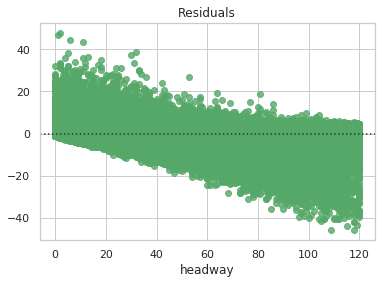

In [14]:
sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
sns.residplot(test_Y, pred, color="g").set_title('Residuals')

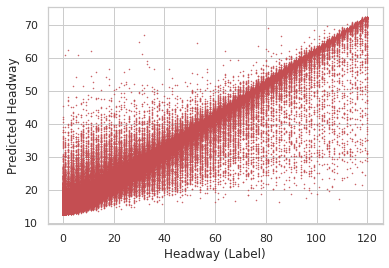

In [15]:
# Print all error to see if there is standard or some big outliers
plt.figure()
plt.plot(test_Y, pred, 'ro', ms=0.5)
plt.xlabel('Headway (Label)')
plt.ylabel('Predicted Headway')
plt.show()

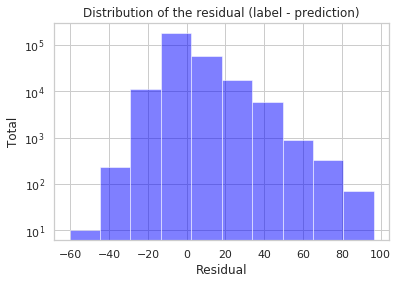

In [16]:
diff = test_Y - np.array(pred).flatten()
num_bins = 10
plt.hist(diff, num_bins, facecolor='blue', alpha=0.5, log=True)
plt.xlabel('Residual')
plt.ylabel('Total')
plt.title('Distribution of the residual (label - prediction)')
plt.show()